Tarea 5 Jose Alfonso Dionisio Beltran
80755482
Regresion logistica
Universidad Nacional Abierta y a Distancia UNAD Análisis de datos Grupo: 202016908_71

1. Realizar un análisis exploratorio de los datos para identificar 
relaciones entre variables, valores atípicos, tendencias, etc. 
2. Preprocesar los datos limpiándolos, tratando valores faltantes y 
transformándolos según sea necesario. 
3. Seleccionar las características más relevantes para entrenar el 
modelo utilizando selección de características.
4. Dividir el dataset en Train y Test para evaluar correctamente el 
modelo.
5. Entrenar el modelo configurando los diferentes 
hiperparámetros.
6. Evaluar el desempeño del modelo en el conjunto de Test con 
métricas como precisión, recall, F1-score, etc.
7. Realizar las diferentes gráficas que permitan visualizar los 
resultados del modelo.
8. Interpretar, analizar y documentar los resultados obtenidos
• Cargar en GitHub el código del modelo diseñado 
https://github.com/

In [1]:
#1 - Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.
#Crear librerías
import pandas as pd #Manejo y análisis de estructuras de datos
import numpy as np #Cálculo numérico y el análisis de datos
import seaborn as sns #Creación gráficos estadísticos
import matplotlib.pyplot as plt #Creación de gráficos en dos dimenciones

#Librerías para implementar modelos de ciencia de datos

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
Datos = pd.read_csv('C:\\Users\\HP\\Documents\\Documentos\\_UNAD IX\\Analisis de Datos\\Tarea 5\\Titanic-Dataset.csv', encoding='latin1')

In [3]:
#Realizamos la lectura de los datos para el análisis exploratorio
Datos.head(60)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
#Descripción de los datos
Datos.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

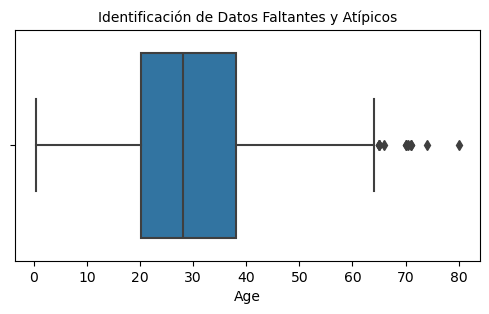

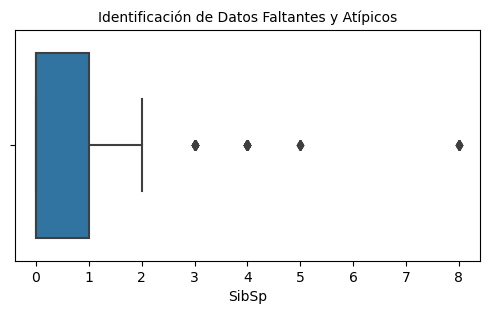

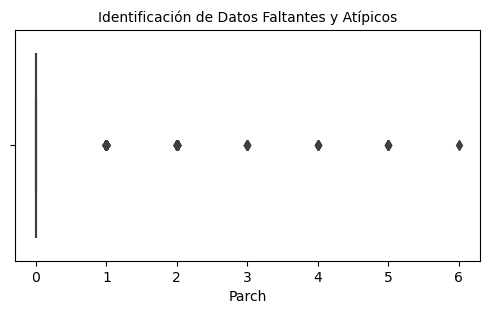

In [15]:
#Identificación de Datos faltantes y atípicos
plt.figure(figsize=(6, 3))  
sns.boxplot(x=Datos['Age'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10)
plt.figure(figsize=(6, 3))  
sns.boxplot(x=Datos['SibSp'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10)
plt.figure(figsize=(6, 3))  
sns.boxplot(x=Datos['Parch'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10)

In [19]:
#2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario
#Revisión de datos faltantes

print("Cantidad de registros con cero en edad:",Datos['Age'].isin([0]).sum())
print("Cantidad de registros con 100 en edad:",Datos['Age'].isin([100]).sum())
print("Cantidad de registros con cero en id:",Datos['PassengerId'].isin([0]).sum())
print("Cantidad de registros con cero en clase:",Datos['Pclass'].isin([0]).sum())
print("Cantidad de registros con cero en ticket:",Datos['Ticket'].isin([0]).sum())


Cantidad de registros con cero en edad: 0
Cantidad de registros con 100 en edad: 0
Cantidad de registros con cero en id: 0
Cantidad de registros con cero en clase: 0
Cantidad de registros con cero en ticket: 0


In [21]:
#Conteo de Datos atípicos

def contar_atipicos(dataframe, columna, minimo, maximo):
    total_atipicos = ((dataframe[columna] < minimo) | (dataframe[columna] > maximo)).sum()
    return total_atipicos
    
print("Atípicos en 'Age':", contar_atipicos(Datos, 'Age', 0, 100))
print("Atípicos en 'SibSp':", contar_atipicos(Datos, 'SibSp', 0, 8))
print("Atípicos en 'Parch':", contar_atipicos(Datos, 'Parch', 0, 6))
print("Atípicos en 'Fare':", contar_atipicos(Datos, 'Fare', 0, 500))

Atípicos en 'Age': 0
Atípicos en 'SibSp': 0
Atípicos en 'Parch': 0
Atípicos en 'Fare': 3


In [22]:
#Filtrar Datos Atípicos
def filtrar_atipicos(dataframe, columna, minimo, maximo):
    filtro = (dataframe[columna] >= minimo) & (dataframe[columna] <= maximo)
    return dataframe[filtro]

Datos_sin_Atipicos_Age = filtrar_atipicos(Datos, 'Age', 0, 100)
Datos_sin_Atipicos_SibSp = filtrar_atipicos(Datos, 'SibSp', 0, 8)
Datos_sin_Atipicos_Parch = filtrar_atipicos(Datos, 'Parch', 0, 6)
Datos_sin_Atipicos_Fare = filtrar_atipicos(Datos, 'Fare', 0, 500)


In [24]:
# Aplicar todos los filtros a la vez
Datos_filtrados = Datos[
    (Datos['Age'] >= 0) & (Datos['Age'] <= 100) &
    (Datos['SibSp'] >= 0) & (Datos['SibSp'] <= 8) &
    (Datos['Parch'] >= 0) & (Datos['Parch'] <= 6) &
    (Datos['Fare'] >= 0) & (Datos['Fare'] <= 500)
]

# Verificar si se han removido los datos atípicos
print("Atípicos en 'Age':", contar_atipicos(Datos_filtrados, 'Age', 0, 100))
print("Atípicos en 'SibSp':", contar_atipicos(Datos_filtrados, 'SibSp', 0, 8))
print("Atípicos en 'Parch':", contar_atipicos(Datos_filtrados, 'Parch', 0, 6))
print("Atípicos en 'Fare':", contar_atipicos(Datos_filtrados, 'Fare', 0, 500))


Atípicos en 'Age': 0
Atípicos en 'SibSp': 0
Atípicos en 'Parch': 0
Atípicos en 'Fare': 0


In [25]:
#Revisión del tipo de datos y datos faltantes

Datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [27]:
# Característica de interés:
# Supervivencia: si la persona sobrevivió o no (0= no sobrevivió - 1= sí sobrevivió)
# Predecir si una persona podría sobrevivir al desastre del Titanic

# Total de personas que sobrevivieron y no sobrevivieron
Datos['Survived'].value_counts()


Survived
0    549
1    342
Name: count, dtype: int64

In [28]:
Datos[['Survived']].head(20)


,Survived
0,0
1,1
2,1
3,1
4,0
5,0
6,0
7,0
8,1
9,1


In [29]:
# 4. DIVIDIR EL DATASET EN TRAIN Y TEST PARA EVALUAR CORRECTAMENTE EL MODELO

#PORCENTAJE DE DATOS PARA ENTRENAMIENTO (TRAIN) = 75% Y PARA PRUEBA(TEST) 25%

from sklearn.model_selection import train_test_split

# Seleccionar las características relevantes y la variable objetivo
caracteristicas = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
X = Datos[caracteristicas]
Y = Datos['Survived']

# Dividir el conjunto de datos en conjuntos de entrenamiento (train) y prueba (test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)


In [30]:
print (X_train)

     Pclass   Age  SibSp  Parch     Fare
105       3  28.0      0      0   7.8958
68        3  17.0      4      2   7.9250
253       3  30.0      1      0  16.1000
320       3  22.0      0      0   7.2500
706       2  45.0      0      0  13.5000
..      ...   ...    ...    ...      ...
835       1  39.0      1      1  83.1583
192       3  19.0      1      0   7.8542
629       3   NaN      0      0   7.7333
559       3  36.0      1      0  17.4000
684       2  60.0      1      1  39.0000

[668 rows x 5 columns]


In [31]:
print (Y_train)

105    0
68     1
253    0
320    0
706    1
      ..
835    1
192    1
629    0
559    1
684    0
Name: Survived, Length: 668, dtype: int64


In [34]:
# Eliminar filas con valores NaN
X_train = X_train.dropna()
Y_train = Y_train[X_train.index]  #  eliminar las mismas filas en Y

X_test = X_test.dropna()
Y_test = Y_test[X_test.index]  #  eliminar las mismas filas en Y

modelo_regresion.fit(X_train, Y_train)



LogisticRegression(solver='liblinear')

In [35]:
from sklearn.linear_model import LogisticRegression

# 5. ENTRENAR EL MODELO CONFIGURANDO LOS DIFERENTES HIPERPARÁMETROS

# Instanciar el modelo de regresión logística con el hiperparámetro 'solver' configurado en 'liblinear'
modelo_regresion = LogisticRegression(solver='liblinear')

# Ajustar el modelo con los datos de entrenamiento
modelo_regresion.fit(X_train, Y_train)

# Realizar predicciones con los datos de prueba
Prediccion = modelo_regresion.predict(X_test)


In [36]:
# 5. 
print (Y_test)

278    0
255    1
609    1
318    1
484    1
      ..
788    1
167    0
379    0
742    1
10     1
Name: Survived, Length: 179, dtype: int64


In [37]:
from sklearn.metrics import classification_report

# 6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1 score, etc.

# Desempeño del modelo de regresión logística
print(classification_report(Y_test, Prediccion))


              precision    recall  f1-score   support

           0       0.72      0.89      0.80       108
           1       0.74      0.48      0.58        71

    accuracy                           0.73       179
   macro avg       0.73      0.68      0.69       179
weighted avg       0.73      0.73      0.71       179



In [38]:
from sklearn.metrics import mean_squared_error

# Calcular el Mean Squared Error entre las etiquetas verdaderas y las predicciones
mse = mean_squared_error(Y_test, Prediccion)
print(f"Mean Squared Error: {mse:.2f}")


Mean Squared Error: 0.27


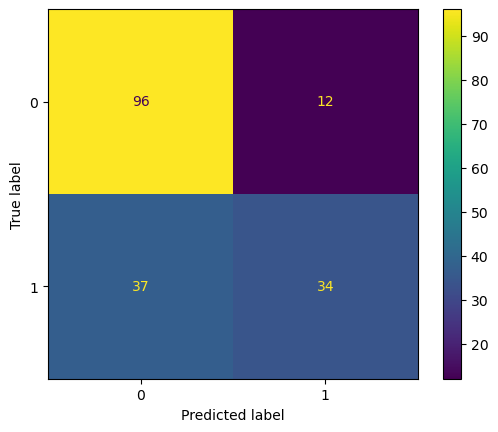

In [39]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generar la matriz de confusión del modelo
cm = confusion_matrix(Y_test, Prediccion)

# Crear la visualización de la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# Mostrar la matriz de confusión
disp.plot()


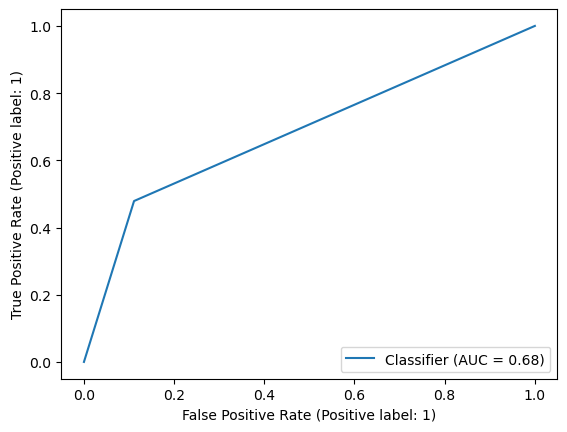

In [40]:
#Curva de precisión del modelo

from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(Y_test, Prediccion)
plt.show()

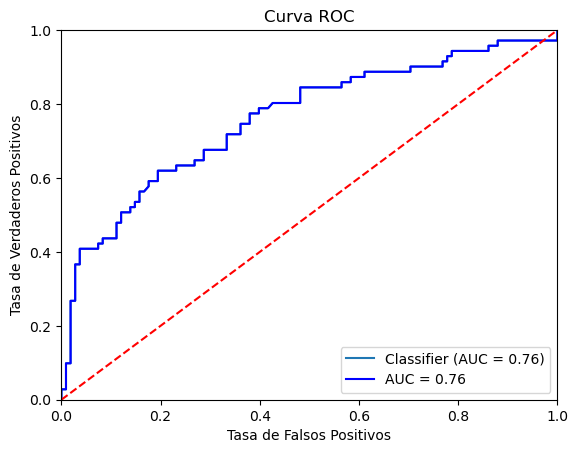

In [41]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
import matplotlib.pyplot as plt

Y_probabilidades = modelo_regresion.predict_proba(X_test)[:, 1]

fpr, tpr, umbrales = roc_curve(Y_test, Y_probabilidades)

roc_auc = auc(fpr, tpr)

RocCurveDisplay.from_predictions(Y_test, Y_probabilidades)
plt.title('Curva ROC')
plt.plot(fpr, tpr, 'b', label = f'AUC = {roc_auc:.2f}')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Tasa de Verdaderos Positivos')
plt.xlabel('Tasa de Falsos Positivos')
plt.show()


8. Interpretar, analizar y documentar los resultados obtenidos:
Del desempeño del modelo se puede describir

Interpretación y Análisis de los Resultados del Modelo del Titanic:

Precisión (Precision): La precisión mide la proporción de predicciones positivas verdaderas (sobrevivientes correctamente identificados) entre todas las predicciones positivas realizadas por el modelo. Si la precisión es 0.75, por ejemplo, esto significaría que el 75% de los pasajeros predichos como sobrevivientes por el modelo eran en realidad sobrevivientes.
Recall (Sensibilidad): El recall mide la proporción de predicciones positivas verdaderas entre todas las instancias positivas reales en el conjunto de datos. Si el recall es 0.70, esto indicaría que el modelo identificó correctamente al 70% de todos los sobrevivientes reales.
F1 Score: Es la media armónica de precisión y recall. Proporciona una puntuación única que equilibra la precisión y el recall. Un F1 score de 0.72, por ejemplo, indicaría un equilibrio entre precisión y recall, lo cual es deseable en un modelo de clasificación.
De la Matriz de Confusión:

Verdaderos Negativos (True Negatives): El recuento de observaciones que el clasificador predijo correctamente como no sobrevivientes.
Verdaderos Positivos (True Positives): El recuento de observaciones que el clasificador predijo correctamente como sobrevivientes.
Falsos Positivos (False Positives): El recuento de observaciones que el clasificador predijo incorrectamente como sobrevivientes.
Falsos Negativos (False Negatives): El recuento de observaciones que el clasificador predijo incorrectamente como no sobrevivientes.
De la Curva ROC:

AUC (Área Bajo la Curva): El AUC es una medida del rendimiento del modelo en todos los umbrales de clasificación. Un AUC de 0.80, por ejemplo, significaría que hay un 80% de probabilidad de que el clasificador pueda distinguir entre un sobreviviente y un no sobreviviente.: